-------------------------------------------------------------------------------------------------------------------------

## Análisis Exploratorio de Datos (EDA)

En esta etapa, empleamos esta técnica para analizar e investigar conjuntos de datos y resumir sus características principales. El EDA nos permite explorar, visualizar y comprender los datos antes de realizar suposiciones. Además, nos ayuda a identificar errores, detectar problemas en los datos, comprender patrones y validar resultados.


----------------------------------------------------------------------------------------------------------------

En primer término, importaremos las librerías de Pyhton necesarias para el análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

Importamos los conjuntos de datos (datasets) transformados en la etapa de ETL, y creamos las estructuras de datos (dataframes) siguientes: **df_trimestre**, **df_localidad**, **df_provincia**.

In [3]:
file1 = 'C:\\Users\\felip\\Desktop\\Proyecto2\\Data\\df_trimestre.csv'
file2 = 'C:\\Users\\felip\\Desktop\\Proyecto2\\Data\\df_localidad.csv'
file3 = 'C:\\Users\\felip\\Desktop\\Proyecto2\\Data\\df_provincia.csv'
df_trimestre = pd.read_csv(file1)
df_localidad = pd.read_csv(file2)
df_provincia = pd.read_csv(file3)

Importamos y creamos un dataframe con datos de geolocalización (**df_partidos**) que nos ayudará en la aplicación de la librería Geopandas.

In [2]:
df_partidos = pd.read_excel('C:\\Users\\felip\\Desktop\\Proyecto2\\Data\\mapa_conectividad.xlsx', sheet_name='Hoja3')
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


#### Iniciamos el análisis a nivel Trimestre (sin provincias), observando los valores numéricos.

In [4]:
# Revisamos los valores numéricos del dataframe
df_trimestre.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,otros_tec,Mbps (Media de bajada),Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,...,Banda ancha fija,Dial up,Total,ingresos_internet,Número de SMS salientes,Llamadas pospago salientes (miles),Llamadas prepago salientes (miles),Total de llamadas salientes (miles),ingresos_movil,ingresos_tv
count,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.0000,40.000000,...,4.000000e+01,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,2018.500000,2.500000,2.791887e+06,4.359240e+06,1.081302e+06,289710.900000,154847.925000,34.341500,47670.6250,222986.575000,...,8.655012e+06,21975.050000,8.676987e+06,3.281153e+07,5.270194e+09,4.561767e+06,2.607668e+06,7.169435e+06,9.238849e+07,4.108952e+07
std,2.908872,1.132277,1.027693e+06,1.308010e+06,1.179722e+06,197048.992979,82678.927051,38.280484,49981.9869,194006.387383,...,1.665017e+06,10146.937312,1.655946e+06,3.850304e+07,5.015184e+09,6.573883e+05,1.216100e+06,1.659922e+06,1.079267e+08,4.296824e+07
min,2014.000000,1.000000,8.363900e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,3.617127,5675.0000,28521.000000,...,6.362108e+06,9991.000000,6.398398e+06,2.984054e+06,6.022739e+08,3.098773e+06,1.023503e+06,4.194639e+06,1.593835e+07,5.600706e+06
25%,2016.000000,1.750000,2.001598e+06,3.102459e+06,1.694705e+05,85307.250000,69048.000000,5.809965,30132.5000,77489.250000,...,7.158156e+06,12035.250000,7.187732e+06,6.817891e+06,1.028221e+09,4.166169e+06,1.345305e+06,5.579159e+06,2.690063e+07,1.264884e+07
50%,2018.500000,2.500000,3.230908e+06,4.374635e+06,5.125560e+05,270359.000000,172437.000000,16.665000,36230.0000,198451.000000,...,8.539082e+06,21813.000000,8.560895e+06,1.842255e+07,3.338478e+09,4.621015e+06,2.624878e+06,7.595851e+06,4.713675e+07,2.488905e+07
75%,2021.000000,3.250000,3.716772e+06,5.687862e+06,1.495696e+06,480829.750000,238176.500000,46.337500,41087.5000,316865.000000,...,9.908322e+06,29576.250000,9.918698e+06,3.942974e+07,7.805438e+09,5.002158e+06,3.677421e+06,8.337053e+06,1.080245e+08,5.239446e+07
max,2023.000000,4.000000,3.803024e+06,6.073426e+06,3.908183e+06,585760.000000,265328.000000,139.040000,241713.0000,687619.000000,...,1.153587e+07,39324.000000,1.154766e+07,1.673760e+08,1.839320e+10,5.977412e+06,4.799840e+06,9.815691e+06,5.153358e+08,1.983310e+08


Se puede observar que el número de conexiones están expresados en unidades y repartidos según el tipo de tecnología. Asimismo, los valores de la velocidad media de bajada son del tipo decimal al igual que los datos de ingresos monetarios.

In [5]:
df_trimestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Año                                  40 non-null     int64  
 1   Trimestre                            40 non-null     int64  
 2   ADSL                                 40 non-null     int64  
 3   Cablemodem                           40 non-null     int64  
 4   Fibra óptica                         40 non-null     int64  
 5   Wireless                             40 non-null     int64  
 6   otros_tec                            40 non-null     int64  
 7   Mbps (Media de bajada)               40 non-null     float64
 8   Hasta 512 kbps                       40 non-null     int64  
 9   Entre 512 Kbps y 1 Mbps              40 non-null     int64  
 10  Entre 1 Mbps y 6 Mbps                40 non-null     int64  
 11  Entre 6 Mbps y 10 Mbps            

Se realiza un análisis de aquellos datos anormales o extremos (**outliers**) dentro de un conjunto de datos, que pueda desviar la tendencias general o sno ser concistentes con el resto de las observaciones.

In [6]:
for column in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'otros_tec', 'Mbps (Media de bajada)', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'otros_vel', 'Banda ancha fija', 'Dial up']:
    q1 = df_trimestre[column].quantile(0.25)
    q3 = df_trimestre[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_trimestre[(df_trimestre[column] < lower_bound) | (df_trimestre[column] > upper_bound)]
    print(f'Columna: {column}, Outliers: {outliers.shape[0]}')

Columna: ADSL, Outliers: 0
Columna: Cablemodem, Outliers: 0
Columna: Fibra óptica, Outliers: 2
Columna: Wireless, Outliers: 0
Columna: otros_tec, Outliers: 0
Columna: Mbps (Media de bajada), Outliers: 4
Columna: Entre 512 Kbps y 1 Mbps, Outliers: 1
Columna: Entre 1 Mbps y 6 Mbps, Outliers: 0
Columna: Entre 6 Mbps y 10 Mbps, Outliers: 4
Columna: Entre 10 Mbps y 20 Mbps, Outliers: 5
Columna: Entre 20 Mbps y 30 Mbps, Outliers: 2
Columna: Más de 30 Mbps, Outliers: 0
Columna: otros_vel, Outliers: 0
Columna: Banda ancha fija, Outliers: 0
Columna: Dial up, Outliers: 0


Se puede observar un número reducido de outliers que no afecta significativamente las métricas del conjunto de datos. Además, es importante considerar que la fuente de datos proviene de un organismo oficial del país, lo que justifica su permanencia en el dataframe.

La información de outliers nos permite avanzar con el análisis exploratorio del dataframe 'df_trimestre' completo.

### Analizamos el acceso a internet por año de acuerdo al tipo de tecnología

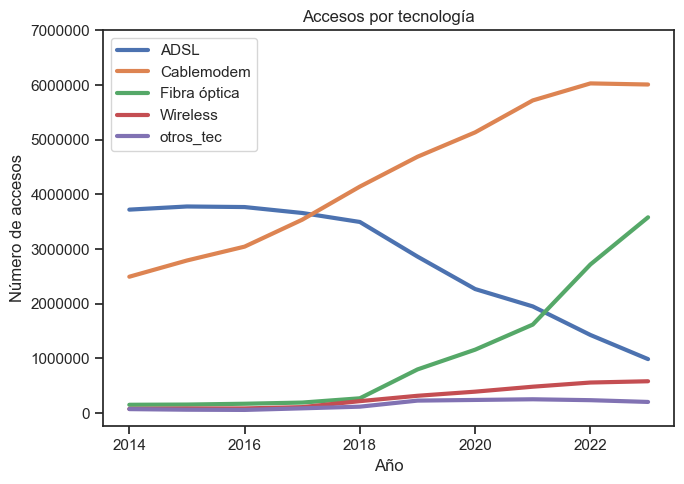

In [7]:
sns.set(style='ticks')
plt.figure(figsize=(7, 5))

# Trabajaremos con un bucle for para ir sumando cda columna al gráfico
for column in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'otros_tec']:
    sns.lineplot(x='Año', y=column, data=df_trimestre, label=column, linewidth=3, errorbar=None)

plt.title('Accesos por tecnología')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.xticks()
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000], ['0', '1000000', '2000000', '3000000', '4000000', '5000000', '6000000', '7000000'])
plt.tight_layout()
plt.legend()
plt.show()

Se puede observar que el cambio tecnológico avanza a nivel estructural en las telecomunicaciones de la República Argentina. Mientras que el uso de ADSL disminuye, tanto el cablemódem como la fibra óptica experimentan un crecimiento significativo. Sin embargo, considerando la tendencia ascendente de la fibra óptica, es plausible que en un futuro cercano esta tecnología se convierta en líder.

Los datos observamos se condice con la publicación en el año 2010 de un decreto del gobierno argentino, donde se crea la Red Federal de Fibra Óptica (REFEFO), cuyas obras comienzan entre los años 2013/14, para "_darle servicio tanto a las instituciones públicas como a prestadoras minoristas de servicios TIC para acortar la brecha digital entre los grandes centros urbanos y las localidades más pequeñas de todo el país"_. (fuente: https://www.argentina.gob.ar/jefatura/innovacion-publica/telecomunicaciones-y-conectividad/conectar/que-es-la-red-federal-de)

### Analizamos la evolución de la velocidad media de bajada.

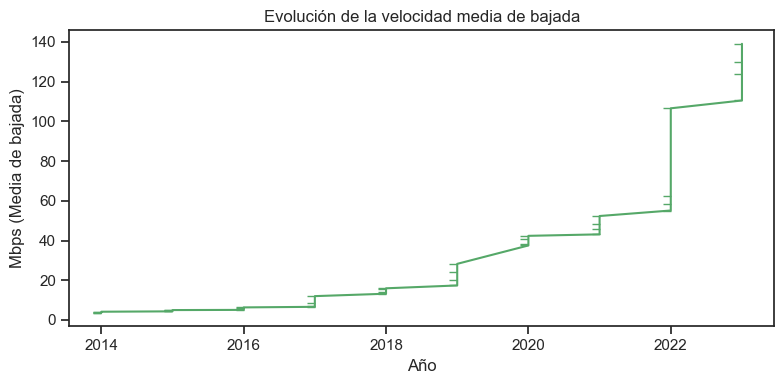

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(df_trimestre['Año'], df_trimestre['Mbps (Media de bajada)'], marker=0, linestyle='-', color='g')

plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Evolución de la velocidad media de bajada')

# for i in range(len(df_trimestre['Mbps (Media de bajada)'])):
#     plt.text(df_trimestre['Año'][i], df_trimestre['Mbps (Media de bajada)'][i] + 0.5, f'{df_trimestre['Mbps (Media de bajada)'][i]:.2f}Mbps', ha='center', va='bottom')

plt.tight_layout()
plt.show()    

El mencionado plan gubernamental generó una rápida expansión tecnológica, evidenciada por el incremento en la velocidad media de descarga. En 2021, este aumento se justificaba debido a que el 85% de los hogares tenía conexión a internet fija, un crecimiento impulsado también por la pandemia de COVID-19. Sin embargo, el cambio más significativo se observa en 2022, con la expansión de las conexiones a la red de fibra óptica.

### Ahora analizamos la evolución de las distintas velocidades y sus accesos por año.

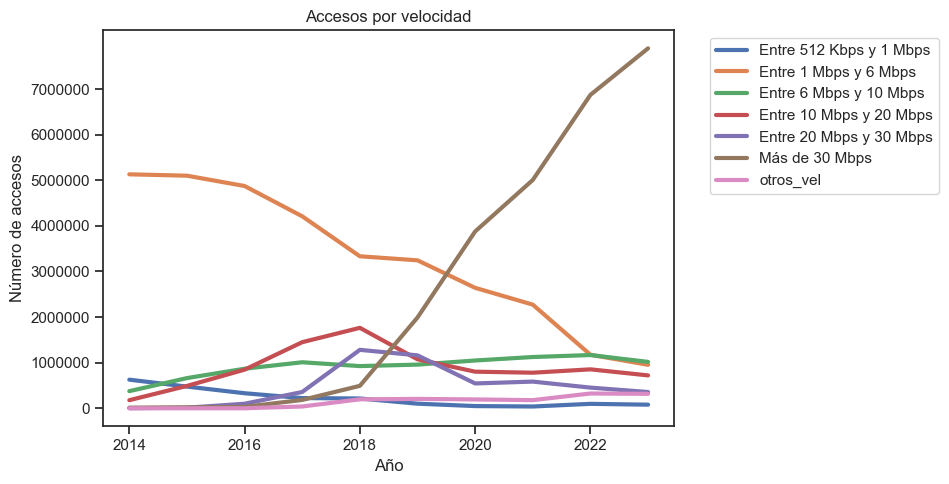

In [9]:
sns.set(style='ticks')
plt.figure(figsize=(7, 5))

# Armamos una lista con las distintas velocidades.
velocidades = ['Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'otros_vel']


# Trabajaremos con un bucle for para ir sumando cda columna al gráfico
for velocidad in velocidades:
    sns.lineplot(x='Año', y=velocidad, data=df_trimestre, label=velocidad, linewidth=3, errorbar=None)

plt.title('Accesos por velocidad')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.xticks()
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000], ['0', '1000000', '2000000', '3000000', '4000000', '5000000', '6000000', '7000000'])
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Puede observarse como a partir del 2018 comienza el crecimiento de los accesos a mayores velocidad de bajada, como también la caída de las de menor velocidad. Veamo las participación de cada acceso:

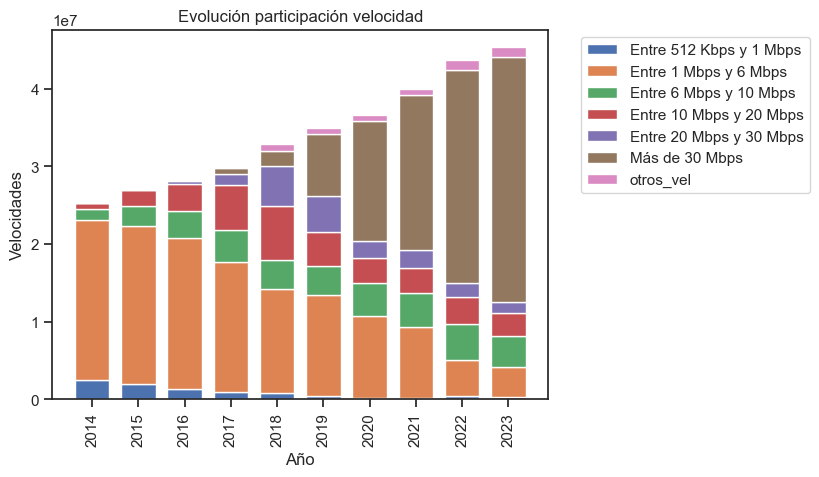

In [10]:

velocidades = ['Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'otros_vel']

# Agrupamos por año.
df_velocidades = df_trimestre.groupby('Año')[velocidades].sum().reset_index()

bar_width = 0.75
Año = df_velocidades['Año']
positions = range(len(Año))
bottom = [0] * len(Año)

for velocidad in velocidades:
    plt.bar(positions, df_velocidades[velocidad], width=bar_width, bottom=bottom, label=velocidad)
    bottom = [b + v for b, v in zip(bottom, df_velocidades[velocidad])]

plt.title('Evolución participación velocidad')
plt.xlabel('Año')
plt.ylabel('Velocidades')
plt.xticks(positions, Año, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Como se observa en el gráfico anterior, ya en 2021, la mitad de las conexiones estaban por encima de los 20 mbps de velocidad. Y posteriormente, en 2022, se da el salto de las altas velocidades por la expansión de la fibra óptica.https://www.cabase.org.ar/cabase-internet-index-el-51-de-las-conexiones-a-internet-en-argentina-superan-los-20-megas/

### Vamos a analizar los ingresos del sector en relación a cada servicio.

En el mercado de las telecomunicaciones en Argentina, se han observado cambios significativos en los ingresos y las tecnologías utilizadas. 
La idea de que las tecnologías emergentes, como los smart TVs conectados a internet, reemplacen al servicio de TV por cable tradicional es relevante.
Algunos proveedores, como Claro y Movistar, han apostado fuertemente por la fibra óptica de alta velocidad, incluso sin ofrecer el servicio de TV por cable tradicional.
Estos cambios tecnológicos pueden afectar los ingresos del sector. Por ejemplo, si más usuarios optan por la fibra óptica, podría haber un desplazamiento de los ingresos desde el cable tradicional hacia esta tecnología.



In [13]:
df_trimestre['total_ingresos'] = df_trimestre['ingresos_internet'] + df_trimestre['ingresos_movil'] + df_trimestre['ingresos_tv']

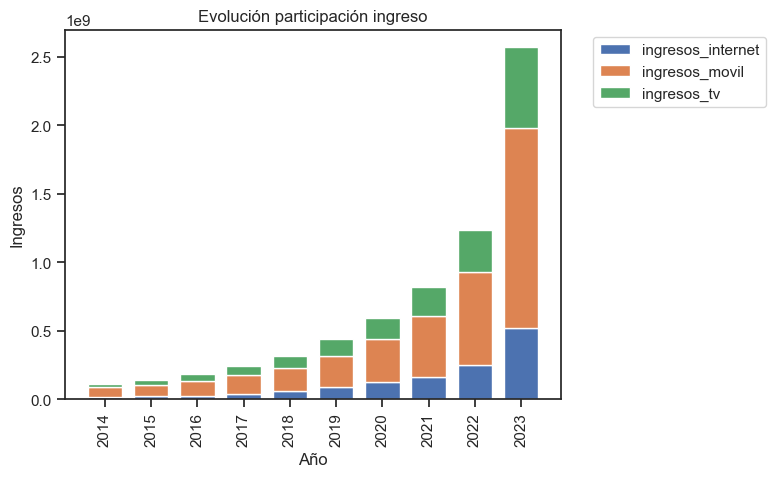

In [14]:
ingresos = ['ingresos_internet', 'ingresos_movil', 'ingresos_tv']

# Agrupamos por año.
df_ingresos = df_trimestre.groupby('Año')[ingresos].sum().reset_index()

bar_width = 0.75
Año = df_ingresos['Año']
positions = range(len(Año))
bottom = [0] * len(Año)

for ingreso in ingresos:
    plt.bar(positions, df_ingresos[ingreso], width=bar_width, bottom=bottom, label=ingreso)
    bottom = [b + v for b, v in zip(bottom, df_ingresos[ingreso])]

plt.title('Evolución participación ingreso')
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.xticks(positions, Año, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

El gráfico anterior está demasiado distorsionado por la variable moneda de cambio y el problema inflacionario del país.
Analicemos la participación porcentual de los ingresos de cada servicio.

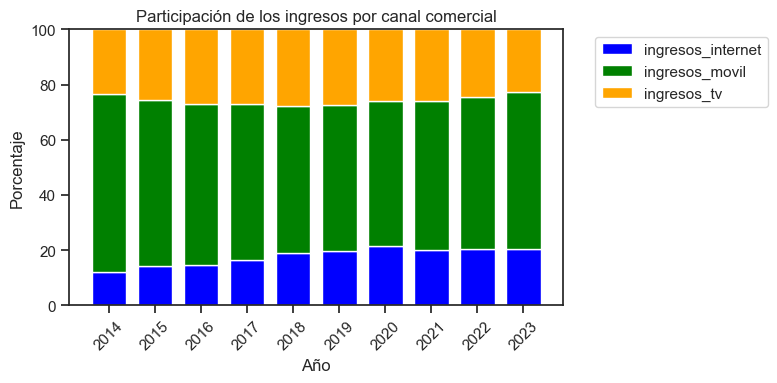

In [50]:
# Suponiendo que 'total_ingresos' es la suma de los tres ingresos
df_trimestre['total_ingresos'] = df_trimestre[['ingresos_internet', 'ingresos_movil', 'ingresos_tv']].sum(axis=1)

# Agrupar solo por Año
df_grouped = df_trimestre.groupby(['Año'])[['ingresos_internet', 'ingresos_movil', 'ingresos_tv', 'total_ingresos']].sum().reset_index()

# Calcular el porcentaje de cada ingreso respecto del total
for ing in ['ingresos_internet', 'ingresos_movil', 'ingresos_tv']:
    df_grouped[f'{ing}_percent'] = df_grouped[ing] / df_grouped['total_ingresos'] * 100

# Diseñamos el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(8, 4))

# Creamos las barras apiladas para cada tecnología
bar_width = 0.75
positions = range(len(df_grouped))

b1 = plt.bar(positions, df_grouped['ingresos_internet_percent'], color='blue', edgecolor='white', width=bar_width)
b2 = plt.bar(positions, df_grouped['ingresos_movil_percent'], bottom=df_grouped['ingresos_internet_percent'], color='green', edgecolor='white', width=bar_width)
b3 = plt.bar(positions, df_grouped['ingresos_tv_percent'], bottom=df_grouped['ingresos_internet_percent'] + df_grouped['ingresos_movil_percent'], color='orange', edgecolor='white', width=bar_width)

# Insertamos títulos y etiquetas
plt.title('Participación de los ingresos por canal comercial')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.xticks(positions, df_grouped['Año'], rotation=45)
plt.ylim(0, 100)
plt.legend((b1[0], b2[0], b3[0]), ('ingresos_internet', 'ingresos_movil', 'ingresos_tv'), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

En este gráfico, podemos observar que los ingresos por internet se mantienen estables en comparación con los servicios de telefonía móvil y TV. Aunque se nota un leve detrimento en este último, no se considera un valor relevante para nuestro estudio.

------------------------------------------------------------------------------------------------------------

#### Vamos a analizar los datos a un nivel más profundo, centrándonos en el comportamiento por provincia. Recordemos que se nos ha solicitado abordar el estudio utilizando un indicador de desempeño (KPI) que exprese un incremento del 2% en los accesos por hogares por trimestre con respecto al trimestre anterior.

Veamos cual fue la evolucíón de los accesos por cada 100 habitantes y por cada 100 hogares.

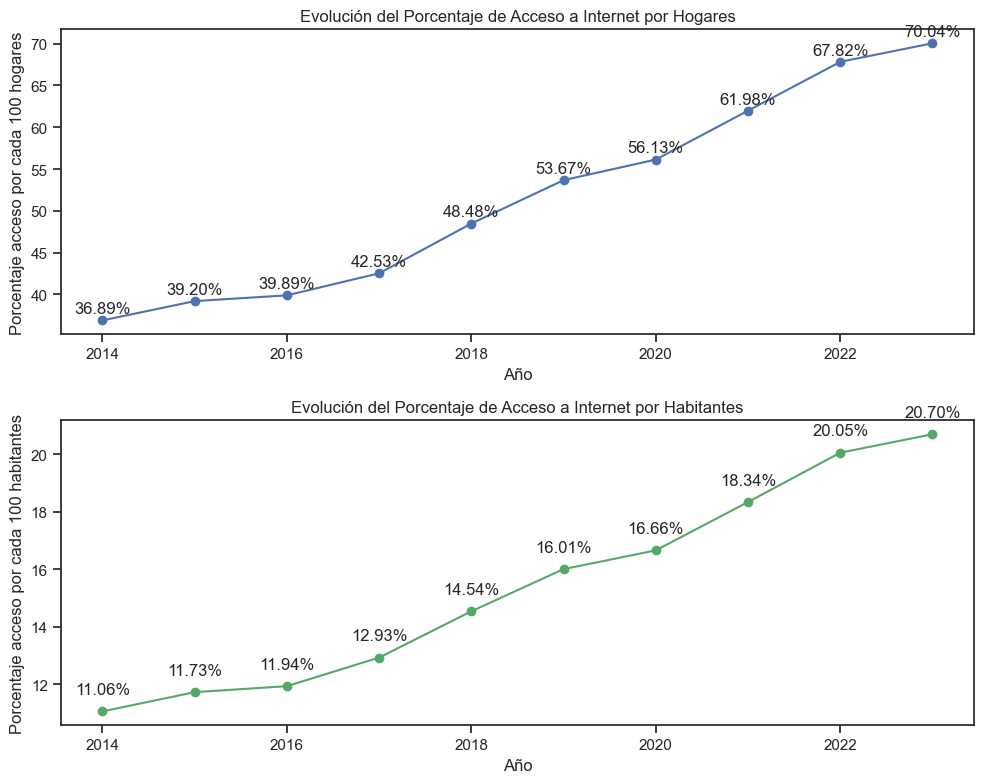

In [51]:
# Agrupación por Año y cálculo de la media
df_hogares = df_provincia.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()
df_habitantes = df_provincia.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()

# Diseñamos el gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Primer gráfico: Acceso por cada 100 hogares
ax[0].plot(df_hogares['Año'], df_hogares['Accesos por cada 100 hogares'], marker='o', linestyle='-', color='b')
ax[0].set_title('Evolución del Porcentaje de Acceso a Internet por Hogares')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Porcentaje acceso por cada 100 hogares')
for i in range(len(df_hogares)):
    ax[0].text(df_hogares['Año'][i], df_hogares['Accesos por cada 100 hogares'][i] + 0.5, f"{df_hogares['Accesos por cada 100 hogares'][i]:.2f}%", ha='center', va='bottom')

# Segundo gráfico: Acceso por cada 100 habitantes
ax[1].plot(df_habitantes['Año'], df_habitantes['Accesos por cada 100 hab'], marker='o', linestyle='-', color='g')
ax[1].set_title('Evolución del Porcentaje de Acceso a Internet por Habitantes')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Porcentaje acceso por cada 100 habitantes')
for i in range(len(df_habitantes)):
    ax[1].text(df_habitantes['Año'][i], df_habitantes['Accesos por cada 100 hab'][i] + 0.5, f"{df_habitantes['Accesos por cada 100 hab'][i]:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Se observa una continuidad entre las curvas de crecimiento, sin embargo el incremento de sólo un 14% de conexiones cada 100 hogares en los último 2 años, nos lleva a ampliar nuestro estudio.
En estudios recientes, se traduce que si bien el 88% de los hogares cuenta con internet fija, sólo el 62% cuenta con una velocidad alta.
https://www.telesemana.com/blog/2024/07/16/panorama-de-la-banda-ancha-en-la-argentina-crece-la-fibra-optica-pero-concentrada-en-las-grandes-ciudades/



#### Analizaremos la distribución de accesos segun cada provincia.

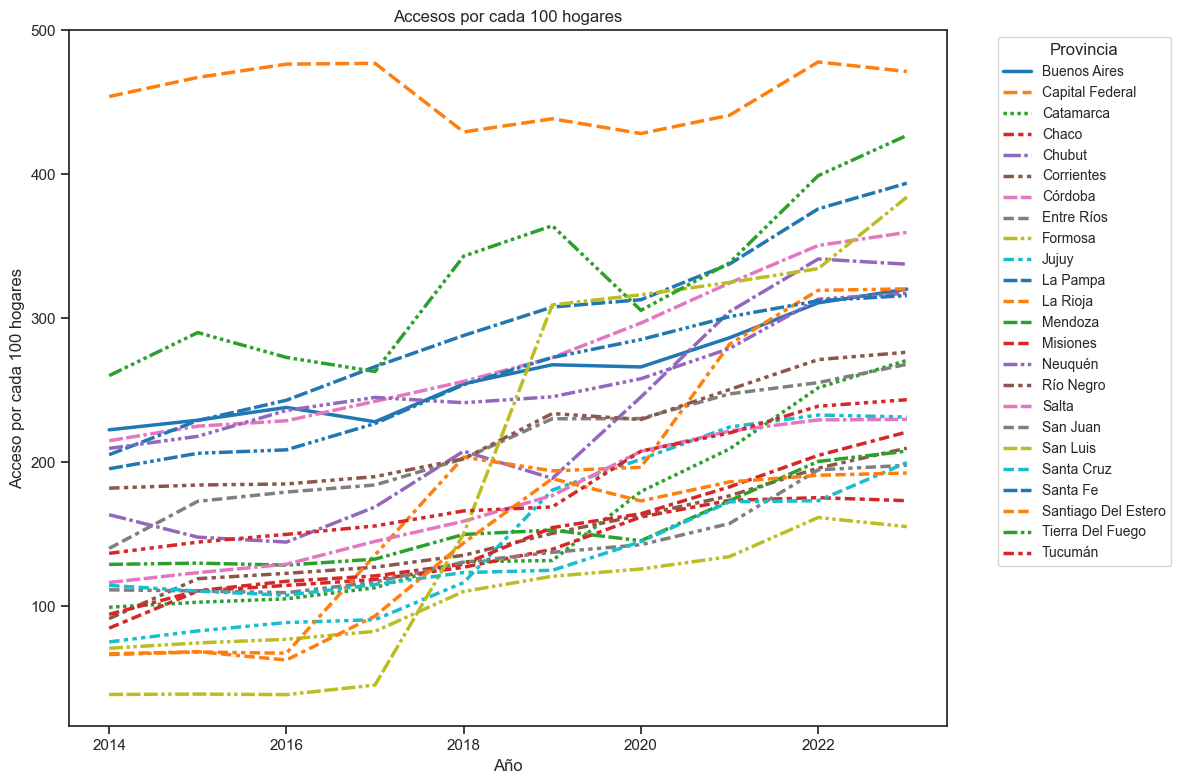

In [15]:
# Se agrupan los regisros por año y provincia, sumando los accesos por cada 100 hogares.
hog_grouped = df_provincia.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].sum().reset_index()

# Rotamos los datos 
pivot = hog_grouped.pivot(index= 'Provincia', columns='Año', values='Accesos por cada 100 hogares')

# Ahora, diseñamos el gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot.T,palette='tab10', linewidth=2.5)
plt.title('Accesos por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Acceso por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')
plt.tight_layout()
plt.show()

Aquí podemos confirmar, que es grande la dispersión de conexiones entre las diferentes provincias, respecto e la evolución a través del tiempo. A continuación, observemos cómo se muestra el porcentaje de conexiones promedio por cada 100 hogares por provincia.

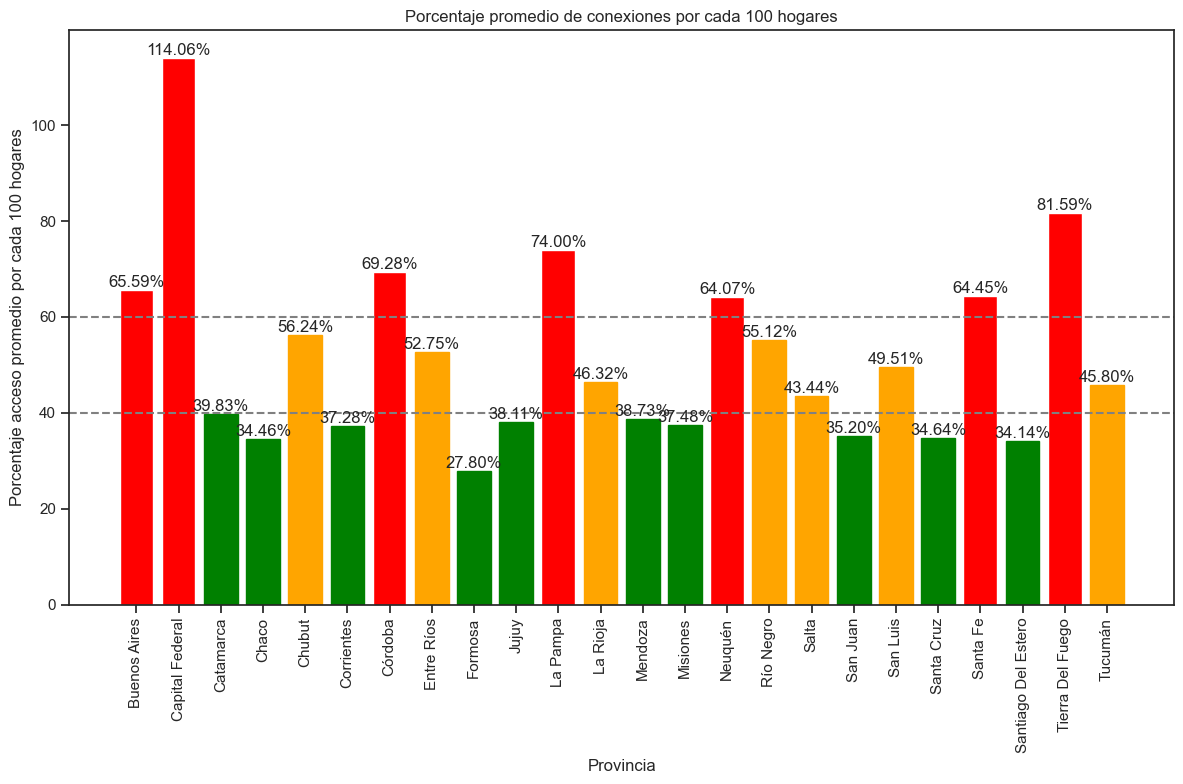

In [19]:
# Agrupamos los registros por provincia y calculamos el promedio de accesos por cada 100 hogares
hog_group = df_provincia.groupby('Provincia')['Accesos por cada 100 hogares'].mean().reset_index()

# Diseñamos el gráfico
plt.figure(figsize=(12, 8))
bars = plt.bar(hog_group['Provincia'], hog_group['Accesos por cada 100 hogares'], color='red')

# Diferenciamos el color de las barras según el promedio de accesos
for i, promedio in zip(bars, hog_group['Accesos por cada 100 hogares']):
    if promedio < 40:
        i.set_color('green')
    elif promedio < 60:
        i.set_color('orange')

# Línea de referencia en el 60%
plt.axhline(y=60, color='grey', linestyle='--')
# Línea de referencia en el 40%
plt.axhline(y=40, color='grey', linestyle='--')

plt.title('Porcentaje promedio de conexiones por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje acceso promedio por cada 100 hogares')
plt.xticks(rotation=90)

# Añadimos las etiquetas de porcentaje en las barras
for i in bars:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Esta gráfica sugiere la existencia de oportunidades comerciales para crecer en varias provincias donde el valor de conexion no alcanza el 40% de de accesos cada 100 hogares.

#### Analizaremos la velocidad media de bajada segun cada provincia.

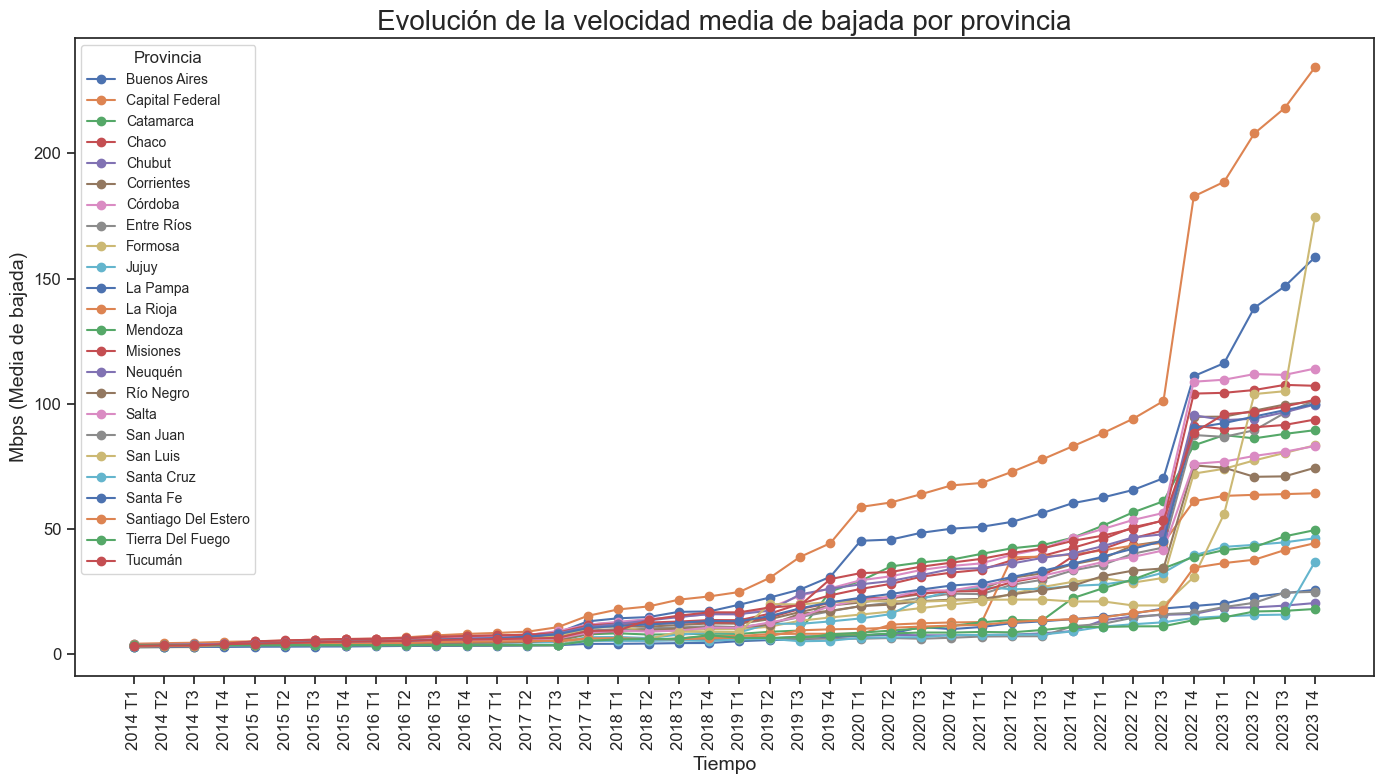

In [17]:
# Primero ordenamos el dataframe por Provincia, Año y Trimestre
df_provincia_sorted = df_provincia.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Crear una columna de tiempo que combine Año y Trimestre para facilitar la visualización
df_provincia_sorted['Tiempo'] = df_provincia_sorted['Año'].astype(str) + ' T' + df_provincia_sorted['Trimestre'].astype(str)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Iterar sobre cada provincia y plotear su evolución a través del tiempo
for provincia in df_provincia_sorted['Provincia'].unique():
    df_provincia_prov = df_provincia_sorted[df_provincia_sorted['Provincia'] == provincia]
    ax.plot(df_provincia_prov['Tiempo'], df_provincia_prov['Mbps (Media de bajada)'], marker='o', label=provincia)

# Añadir título y etiquetas de los ejes
ax.set_title('Evolución de la velocidad media de bajada por provincia', fontsize=20)
ax.set_xlabel('Tiempo', fontsize=14)
ax.set_ylabel('Mbps (Media de bajada)', fontsize=14)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Añadir una leyenda dentro del gráfico en la esquina superior izquierda
plt.legend(title='Provincia', loc='upper left', bbox_to_anchor=(0, 1), fontsize='small')

# Ajustar el layout para que no se solapen los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Podemos observar que la mayor concentración de la red de fibra óptica se encuentra en las grandes ciudades, lo que impacta directamente en la velocidad media de descarga. Ciudades como CABA, Gran Buenos Aires, Santa Fe o Córdoba presentan valores más altos. Además, es importante mencionar el programa ‘San Luis a Mil’, lanzado en 2022 en la provincia de San Luis, que introdujo la red de fibra óptica en las 25 localidades más importantes de la provincia. Este esfuerzo se refleja en el gráfico con un salto exponencial en la tendencia de la curva

### Veamos la participción de conexiones respecto del tipo de tecnología.

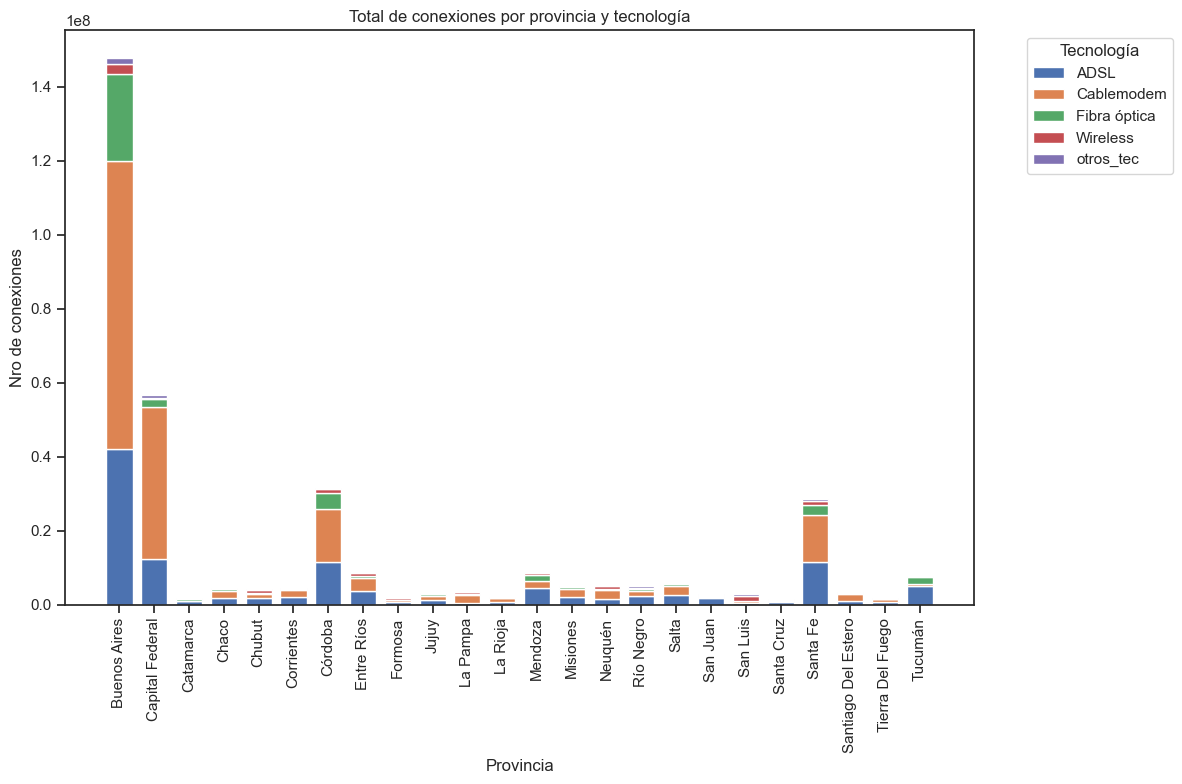

In [54]:
tech = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'otros_tec']

# Agrupamos por provincia
tecno = df_provincia.groupby('Provincia')[tech].sum().reset_index()

# Diseñamos el gráfico
plt.figure(figsize=(12, 8))

# Realizaremos un gráfico de barras apiladas
bar_width = 0.75
provincias = tecno['Provincia']
positions = range(len(provincias))
bottom = [0] * len(provincias)  # Se inicializa la base de la barra

# Aplicamos un bucle for para crear una barra por cada tecnología
for t in tech:
    plt.bar(positions, tecno[t], width=bar_width, bottom=bottom, label=t)
    bottom = [i+j for i, j in zip(bottom, tecno[t])]  # Actualizar la base de la barra

# Añadimos título y etiqueta
plt.title('Total de conexiones por provincia y tecnología')
plt.xlabel('Provincia')
plt.ylabel('Nro de conexiones')
plt.xticks(positions, provincias, rotation=90)
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

En el gráfico anterior, se observa que la fibra óptica aún tiene margen de crecimiento en el mercado. Este aspecto será otro punto importante a considerar en nuestro estudio de índices de desempeño.

## Mapas satelitales

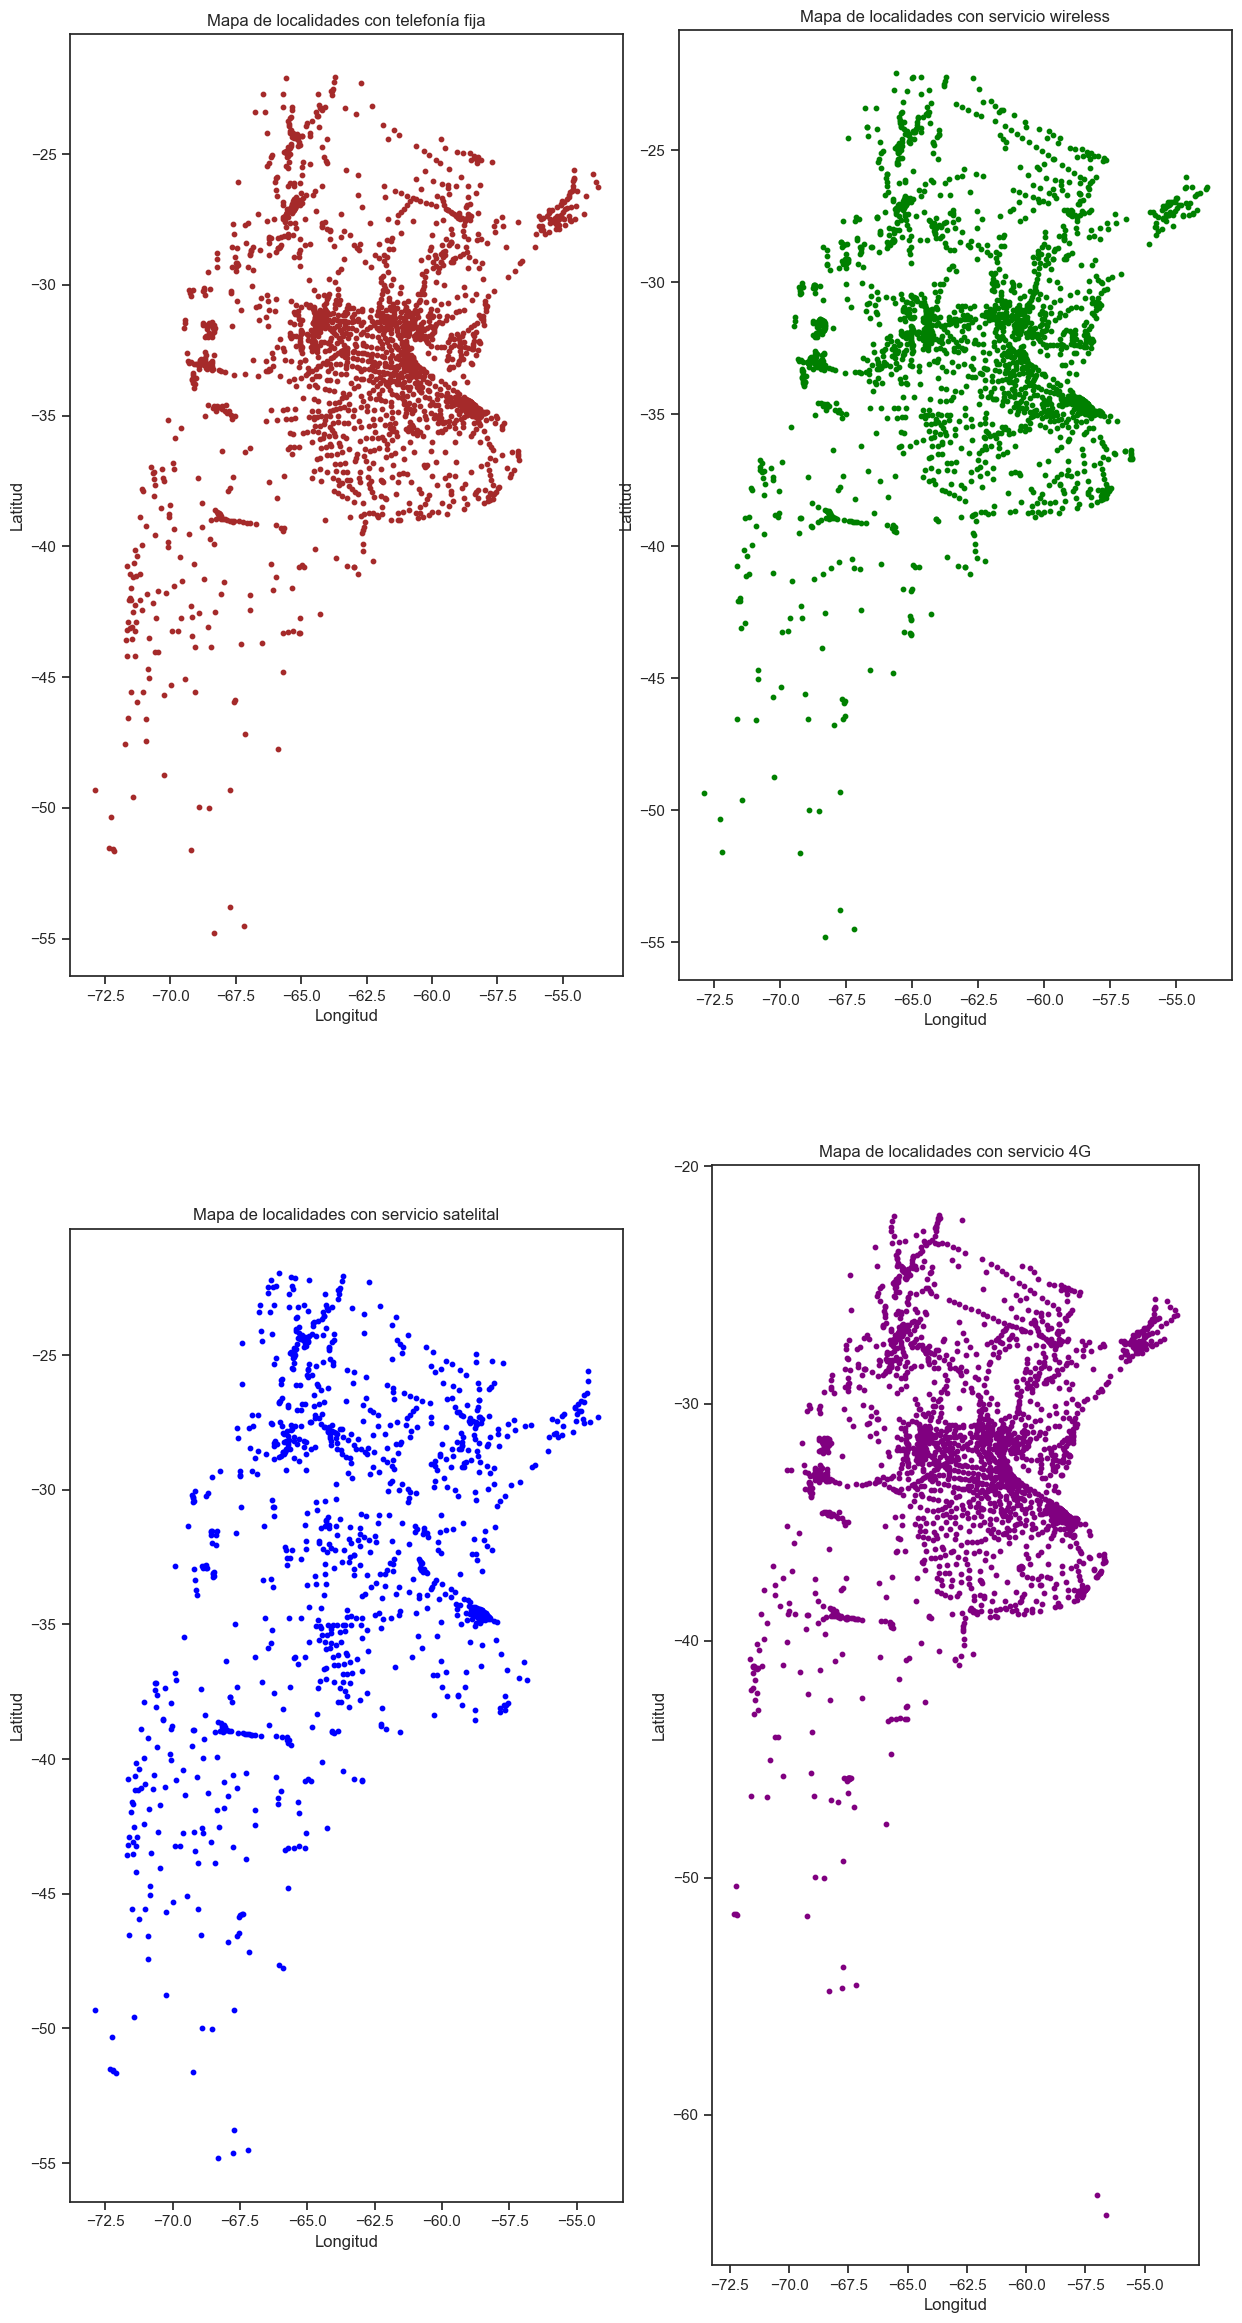

In [58]:
# Filtrar datos de telefonía fija
df_telefonia = df_partidos[df_partidos['Telefonía Fija'] == 'Sí']
df_telefonia['Latitud'] = df_telefonia['Latitud'].astype(float)
df_telefonia['Longitud'] = df_telefonia['Longitud'].astype(float)
geometry_telefonia = gpd.points_from_xy(df_telefonia['Longitud'], df_telefonia['Latitud'])
gdf_telefonia = gpd.GeoDataFrame(df_telefonia, geometry=geometry_telefonia)

# Filtrar datos de servicio wireless
df_wireless = df_partidos[df_partidos['Wireless'] == 'Sí']
df_wireless['Latitud'] = df_wireless['Latitud'].astype(float)
df_wireless['Longitud'] = df_wireless['Longitud'].astype(float)
geometry_wireless = gpd.points_from_xy(df_wireless['Longitud'], df_wireless['Latitud'])
gdf_wireless = gpd.GeoDataFrame(df_wireless, geometry=geometry_wireless)

# Filtrar datos de servicio satelital
df_satelital = df_partidos[df_partidos['Satelital'] == 'Sí']
df_satelital['Latitud'] = df_satelital['Latitud'].astype(float)
df_satelital['Longitud'] = df_satelital['Longitud'].astype(float)
geometry_satelital = gpd.points_from_xy(df_satelital['Longitud'], df_satelital['Latitud'])
gdf_satelital = gpd.GeoDataFrame(df_satelital, geometry=geometry_satelital)

# Filtrar datos de servicio 4G
df_4G = df_partidos[df_partidos['4G'] == 'Sí']
df_4G['Latitud'] = df_4G['Latitud'].astype(float)
df_4G['Longitud'] = df_4G['Longitud'].astype(float)
geometry_4G = gpd.points_from_xy(df_4G['Longitud'], df_4G['Latitud'])
gdf_4G = gpd.GeoDataFrame(df_4G, geometry=geometry_4G)

# Crear la figura con subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 30), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

# Plotear los puntos de telefonía fija
gdf_telefonia.plot(ax=axs[0, 0], markersize=10, color='brown')
axs[0, 0].set_title('Mapa de localidades con telefonía fija')
axs[0, 0].set_xlabel('Longitud')
axs[0, 0].set_ylabel('Latitud')

# Plotear los puntos de servicio wireless
gdf_wireless.plot(ax=axs[0, 1], markersize=10, color='green')
axs[0, 1].set_title('Mapa de localidades con servicio wireless')
axs[0, 1].set_xlabel('Longitud')
axs[0, 1].set_ylabel('Latitud')

# Plotear los puntos de servicio satelital
gdf_satelital.plot(ax=axs[1, 0], markersize=10, color='blue')
axs[1, 0].set_title('Mapa de localidades con servicio satelital')
axs[1, 0].set_xlabel('Longitud')
axs[1, 0].set_ylabel('Latitud')

# Plotear los puntos de servicio 4G
gdf_4G.plot(ax=axs[1, 1], markersize=10, color='purple')
axs[1, 1].set_title('Mapa de localidades con servicio 4G')
axs[1, 1].set_xlabel('Longitud')
axs[1, 1].set_ylabel('Latitud')

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()

En este análisis, utilizamos herramientas de geolocalización para comprender visualmente las distancias significativas entre las localidades en todo el país. Observamos similitudes en los gráficos de distribución para la telefonía fija, la tecnología inalámbrica (wireless) y la red 4G. Sin embargo, la penetración del servicio satelital muestra conexiones más limitadas. Se espera que en los próximos trimestres este servicio experimente un aumento en la cobertura debido al reciente anuncio de la entrada de la empresa Starlink al país. Starlink competirá con la estatal Arsat en la prestación de servicios satelitales.
https://www.infobae.com/tecno/2024/03/25/starlink-llega-a-argentina-la-fecha-de-lanzamiento-las-caracteristicas-del-servicio-satelital-y-como-se-instala/

Veamos en los mapas satelitales la cobertura de las distintas tecnologías.

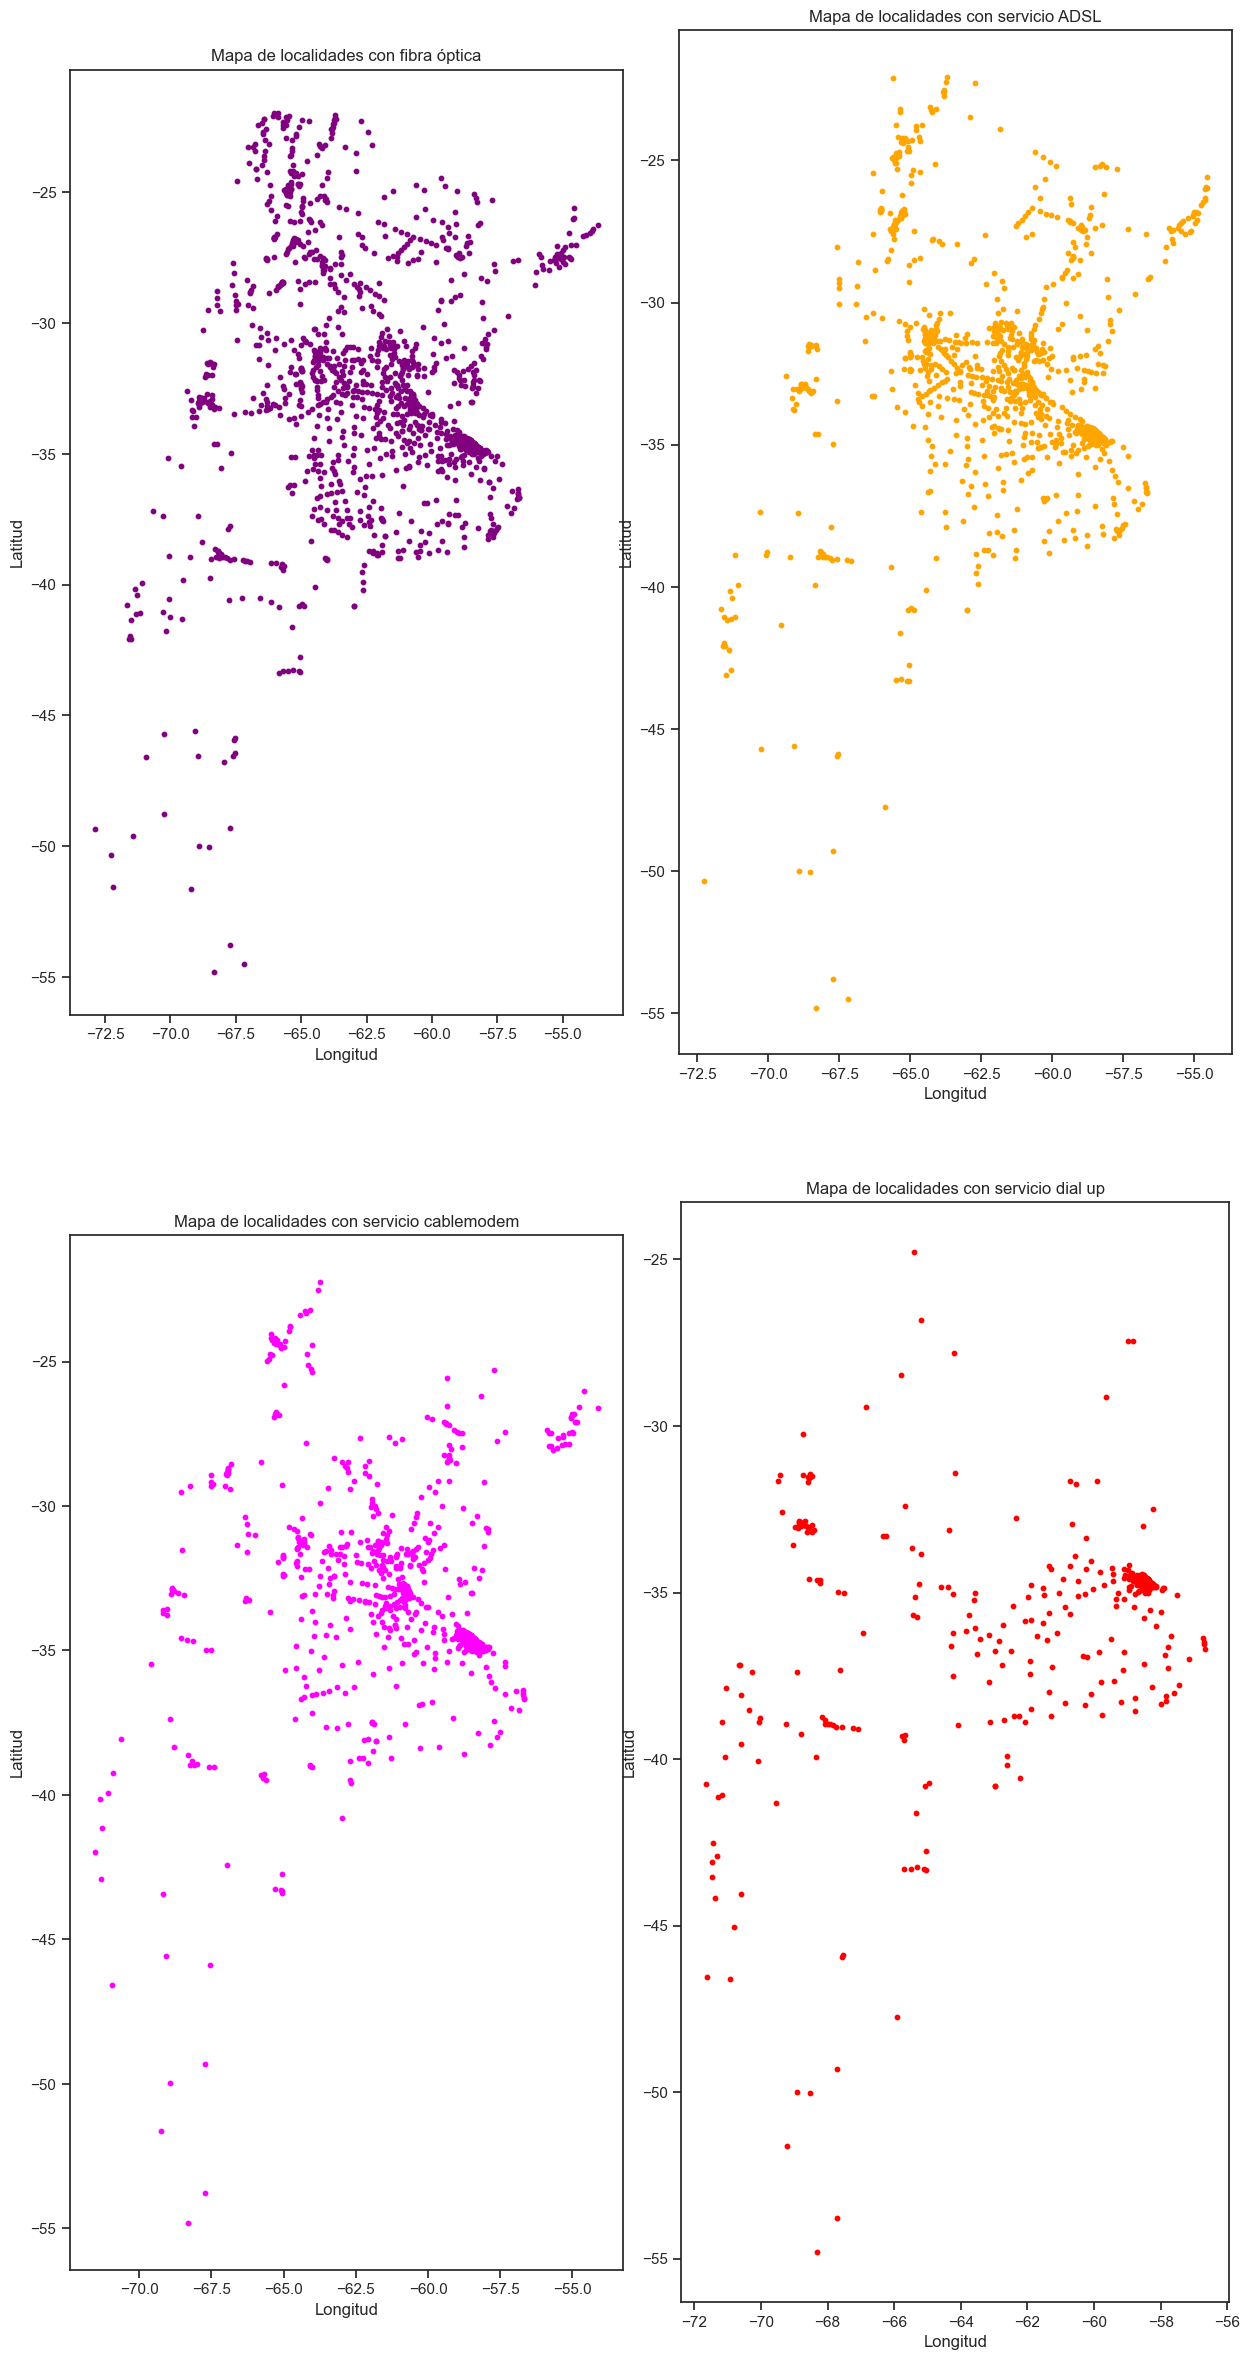

In [59]:
# Filtrar datos de Fibra óptica
df_fibra = df_partidos[df_partidos['Fibra óptica'] == 'Sí']
df_fibra['Latitud'] = df_fibra['Latitud'].astype(float)
df_fibra['Longitud'] = df_fibra['Longitud'].astype(float)
geometry_fibra = gpd.points_from_xy(df_fibra['Longitud'], df_fibra['Latitud'])
gdf_fibra = gpd.GeoDataFrame(df_fibra, geometry=geometry_fibra)

# Filtrar datos de ADSL
df_adsl = df_partidos[df_partidos['ADSL'] == 'Sí']
df_adsl['Latitud'] = df_adsl['Latitud'].astype(float)
df_adsl['Longitud'] = df_adsl['Longitud'].astype(float)
geometry_adsl = gpd.points_from_xy(df_adsl['Longitud'], df_adsl['Latitud'])
gdf_adsl = gpd.GeoDataFrame(df_adsl, geometry=geometry_adsl)

# Filtrar datos de Cablemodem
df_cable = df_partidos[df_partidos['Cablemódem'] == 'Sí']
df_cable['Latitud'] = df_cable['Latitud'].astype(float)
df_cable['Longitud'] = df_cable['Longitud'].astype(float)
geometry_cable = gpd.points_from_xy(df_cable['Longitud'], df_cable['Latitud'])
gdf_cable = gpd.GeoDataFrame(df_cable, geometry=geometry_cable)

# Filtrar datos de Dial up
df_dialup = df_partidos[df_partidos['Dial Up'] == 'Sí']
df_dialup['Latitud'] = df_dialup['Latitud'].astype(float)
df_dialup['Longitud'] = df_dialup['Longitud'].astype(float)
geometry_dialup = gpd.points_from_xy(df_dialup['Longitud'], df_dialup['Latitud'])
gdf_dialup = gpd.GeoDataFrame(df_dialup, geometry=geometry_dialup)

# Crear la figura con subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 30), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

# Plotear los puntos de telefonía fija
gdf_fibra.plot(ax=axs[0, 0], markersize=10, color='purple')
axs[0, 0].set_title('Mapa de localidades con fibra óptica')
axs[0, 0].set_xlabel('Longitud')
axs[0, 0].set_ylabel('Latitud')

# Plotear los puntos de servicio wireless
gdf_adsl.plot(ax=axs[0, 1], markersize=10, color='orange')
axs[0, 1].set_title('Mapa de localidades con servicio ADSL')
axs[0, 1].set_xlabel('Longitud')
axs[0, 1].set_ylabel('Latitud')

# Plotear los puntos de servicio satelital
gdf_cable.plot(ax=axs[1, 0], markersize=10, color='magenta')
axs[1, 0].set_title('Mapa de localidades con servicio cablemodem')
axs[1, 0].set_xlabel('Longitud')
axs[1, 0].set_ylabel('Latitud')

# Plotear los puntos de servicio 4G
gdf_dialup.plot(ax=axs[1, 1], markersize=10, color='red')
axs[1, 1].set_title('Mapa de localidades con servicio dial up')
axs[1, 1].set_xlabel('Longitud')
axs[1, 1].set_ylabel('Latitud')

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()

En los gráficos, se puede observar que la fibra óptica tiene una mayor cobertura que las otras tecnologías. Esto sugiere que sería un buen escenario para trabajar en la actualización tecnológica de los usuarios. Es importante recordar que la penetración de la red de fibra óptica contribuye a reducir la brecha digital entre los grandes centros urbanos y las pequeñas y medianas localidades. En estas últimas, donde no existen proveedores de servicios de Internet o la cobertura es insuficiente debido a razones de rentabilidad del mercado, la fibra óptica puede propiciar el desarrollo de proveedores minoristas, cooperativas y pymes. Además, al reducir los costos de acceso al mercado mayorista de Internet, se fomenta la inclusión digital.

----------------------------------------------------------------------------------------------------

### A continuación trabajaremos en tres (3) KPI's, el solicitado y otros dos propuestos en base al Anáiisis Exploratorio anterior. El funcionamiento de los mismos quedará reflejado en el dashboard interactivo.

KPI 1 = Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre.<div style="page-break-after: always;"></div>

KPI 2 = Aumentar en un 5% la velocidad media para el próximo trimestre, medido cada 100 hogares por provincia. <div style="page-break-after: always;"></div>

KPI 3 = Dentro del concepto anterior de upgrade del servicio, Aumentar en un 15% el acceso a servicios de Internet a través de fibra óptica para el próximo trimestre, medido como porcentaje de hogares por provincia. 

----------------------------------------------------------------------------

**KPI 1 = Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia**. La fórmula es la siguiente:

Donde: KPI = ((Nuevo_acceso / Acceso_actual) / Acceso_actual) * 100

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

In [27]:
# Armamos un nuevo dataframe con los campos necesarios
df_kpi = df_provincia[['Provincia', 'Año', 'Trimestre', 'Accesos por cada 100 hogares']]
# Renombramos el campo para claridad
df_kpi.rename(columns={'Accesos por cada 100 hogares': 'acceso_actual'}, inplace=True)
# Ordenamos el dataframe
df_kpi.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)
# Creamos el campo 'nuevo acceso'
df_kpi['nuevo_acceso'] = df_kpi.groupby('Provincia')['acceso_actual'].shift(-1)
# Calculamos el KPI
df_kpi['KPI'] = ((df_kpi['nuevo_acceso'] / df_kpi['acceso_actual']) - 1) * 100
# Redondeamos el KPI
df_kpi['KPI'] = df_kpi['KPI'].round(2)
# Eliminamos filas NaN en nuevo_acceso si las hubiere
df_kpi.dropna(subset=['nuevo_acceso'], inplace=True)
# Verificamos KPI
print(df_kpi)

        Provincia   Año  Trimestre  acceso_actual  nuevo_acceso   KPI
936  Buenos Aires  2014          1      54.570073     55.061417  0.90
912  Buenos Aires  2014          2      55.061417     56.754739  3.08
888  Buenos Aires  2014          3      56.754739     56.094337 -1.16
864  Buenos Aires  2014          4      56.094337     56.370484  0.49
840  Buenos Aires  2015          1      56.370484     56.802806  0.77
..            ...   ...        ...            ...           ...   ...
143       Tucumán  2022          3      61.140000     61.040000 -0.16
119       Tucumán  2022          4      61.040000     60.340000 -1.15
95        Tucumán  2023          1      60.340000     60.750000  0.68
71        Tucumán  2023          2      60.750000     61.260000  0.84
47        Tucumán  2023          3      61.260000     61.040000 -0.36

[936 rows x 6 columns]


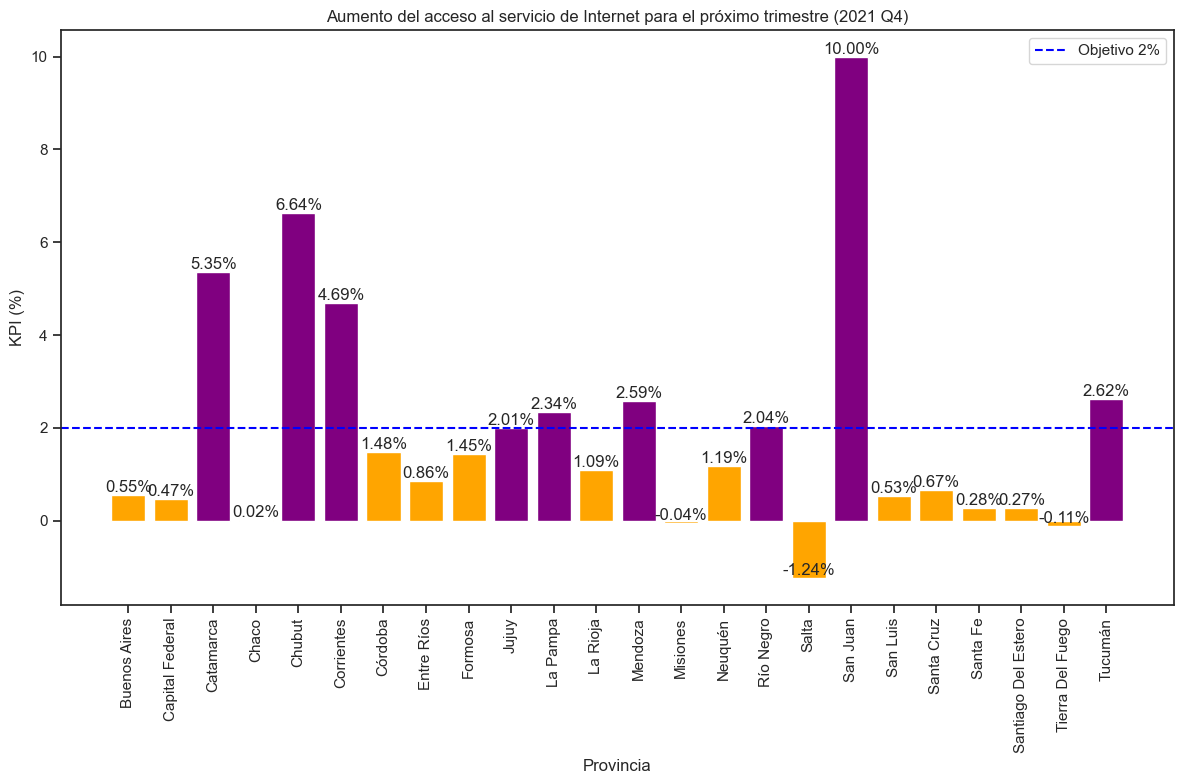

In [28]:
# Seleccionamos el año y trimestre específicos
year = 2021  # Cambia este valor al año deseado
quarter = 4  # Cambia este valor al trimestre deseado
# Filtramos el DataFrame para el año y trimestre seleccionados
df_kpi_filtered = df_kpi[(df_kpi['Año'] == year) & (df_kpi['Trimestre'] == quarter)]
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
# Usar diferentes colores para barras que cumplen o no cumplen el objetivo
colors = ['purple' if kpi >= 2 else 'orange' for kpi in df_kpi_filtered['KPI']]
bars = plt.bar(df_kpi_filtered['Provincia'], df_kpi_filtered['KPI'], color=colors)
# Añadir título y etiquetas
plt.title(f'Aumento del acceso al servicio de Internet para el próximo trimestre ({year} Q{quarter})')
plt.xlabel('Provincia')
plt.ylabel('KPI (%)')
plt.xticks(rotation=90)
# Añadir una línea de referencia para el objetivo del 2%
plt.axhline(y=2, color='blue', linestyle='--', label='Objetivo 2%')
# Añadir etiquetas de porcentaje en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**KPI 2 = Aumentar en un 5% la velocidad media para el próximo trimestre, medido cada 100 hogares por provincia.**. 



In [29]:
# Plantearemos un segundo KPI, sobre la evolución de la velocidad media por provincia.
# Armamos un nuevo dataframe con los campos necesarios
df_kpi2 = df_provincia[['Provincia', 'Año', 'Trimestre', 'Mbps (Media de bajada)']]
# Renombramos el campo para claridad
df_kpi2.rename(columns={'Mbps (Media de bajada)': 'media_actual'}, inplace=True)
# Ordenamos el dataframe
df_kpi2.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)
# Creamos el campo 'nuevo acceso'
df_kpi2['nueva_media'] = df_kpi2.groupby('Provincia')['media_actual'].shift(-1)
# Calculamos el KPI
df_kpi2['KPI2'] = ((df_kpi2['nueva_media'] / df_kpi2['media_actual']) - 1) * 100
# Redondeamos el KPI
df_kpi2['KPI2'] = df_kpi2['KPI2'].round(2)
# Eliminamos filas NaN en nuevo_acceso si las hubiere
df_kpi2.dropna(subset=['nueva_media'], inplace=True)
# Verificamos KPI
print(df_kpi2)

        Provincia   Año  Trimestre  media_actual  nueva_media   KPI2
936  Buenos Aires  2014          1      3.733133     3.851863   3.18
912  Buenos Aires  2014          2      3.851863     3.969047   3.04
888  Buenos Aires  2014          3      3.969047     4.198944   5.79
864  Buenos Aires  2014          4      4.198944     4.323804   2.97
840  Buenos Aires  2015          1      4.323804     4.463496   3.23
..            ...   ...        ...           ...          ...    ...
143       Tucumán  2022          3     53.360000    88.330000  65.54
119       Tucumán  2022          4     88.330000    95.790000   8.45
95        Tucumán  2023          1     95.790000    96.690000   0.94
71        Tucumán  2023          2     96.690000    98.850000   2.23
47        Tucumán  2023          3     98.850000   101.550000   2.73

[936 rows x 6 columns]


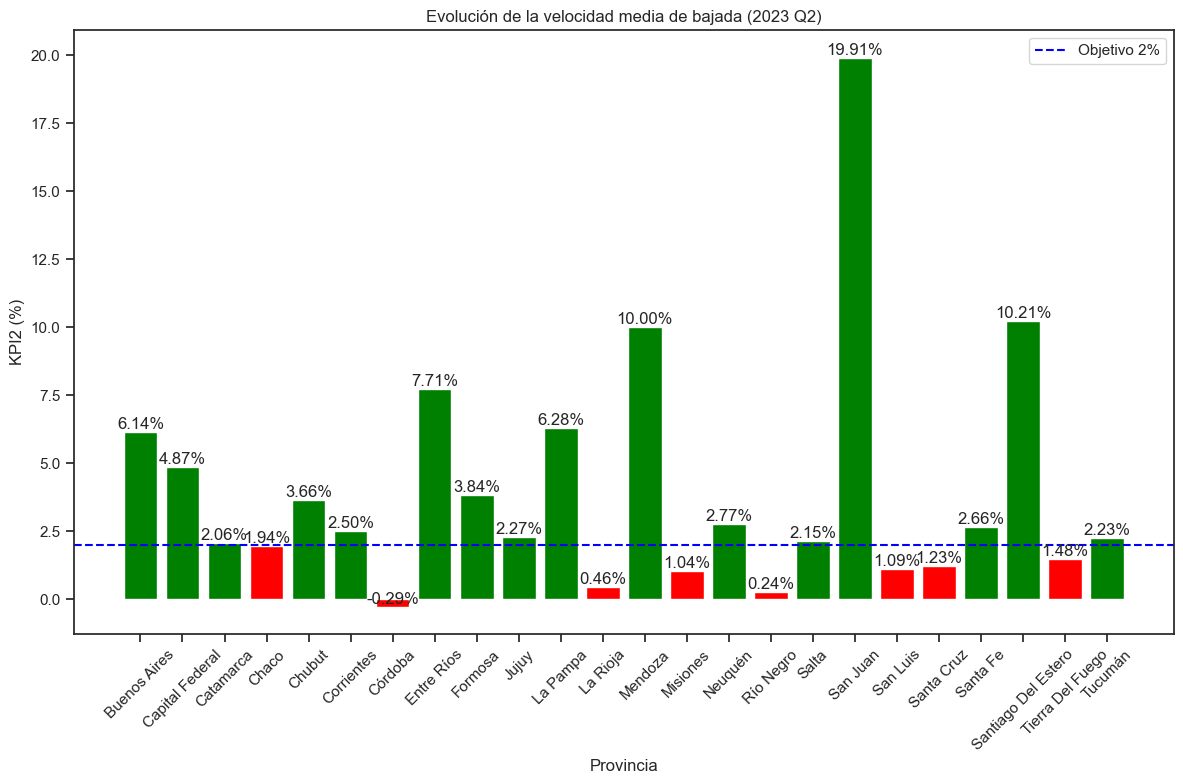

In [30]:
# Seleccionar el año y trimestre específicos
year = 2023  # Cambia este valor al año deseado
quarter = 2  # Cambia este valor al trimestre deseado
# Filtrar el DataFrame para el año y trimestre seleccionados
df_kpi2_filtered = df_kpi2[(df_kpi2['Año'] == year) & (df_kpi2['Trimestre'] == quarter)]
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
# Usar diferentes colores para barras que cumplen o no cumplen el objetivo (por ejemplo, un aumento del 2%)
colors = ['green' if kpi >= 2 else 'red' for kpi in df_kpi2_filtered['KPI2']]
bars = plt.bar(df_kpi2_filtered['Provincia'], df_kpi2_filtered['KPI2'], color=colors)
# Añadir título y etiquetas
plt.title(f'Evolución de la velocidad media de bajada ({year} Q{quarter})')
plt.xlabel('Provincia')
plt.ylabel('KPI2 (%)')
plt.xticks(rotation=45)
# Añadir una línea de referencia para el objetivo del 2%
plt.axhline(y=2, color='blue', linestyle='--', label='Objetivo 2%')
# Añadir etiquetas de porcentaje en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')
# Añadir leyenda
plt.legend()
# Mostrar el gráfico
plt.tight_layout()
plt.show()

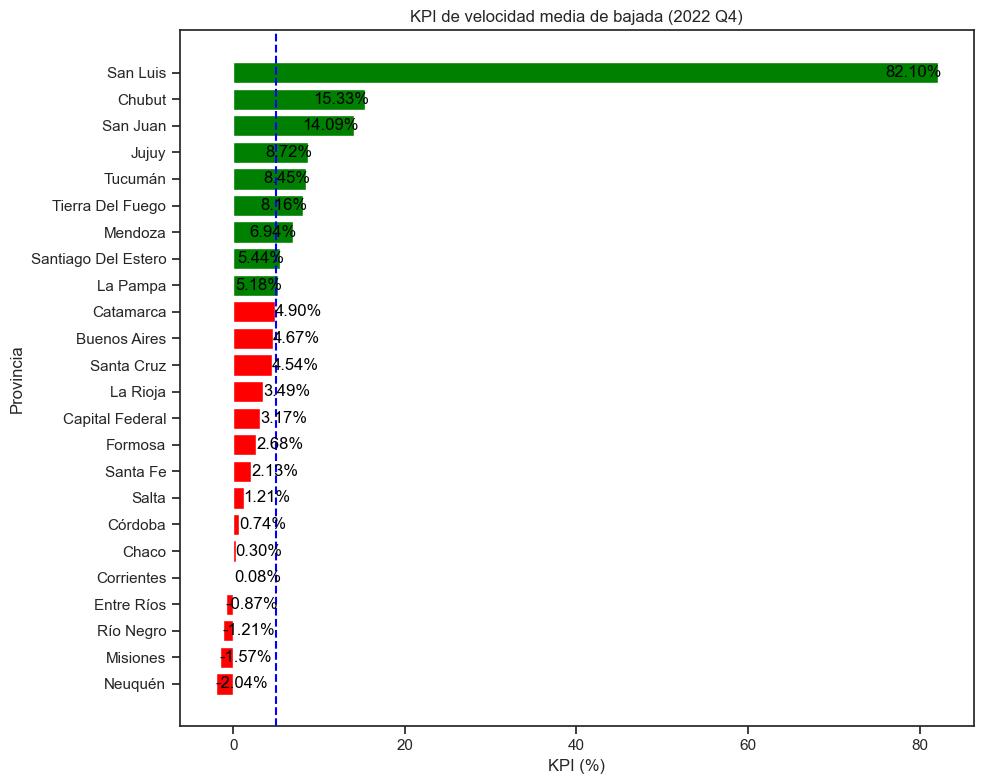

In [31]:
# Diseñamos el gráfico pero con barras horizontales 
# Filtrar un trimestre específico
year = 2022  # Reemplaza con el año específico que quieres analizar
quarter = 4  # Reemplaza con el trimestre específico que quieres analizar
df_barra = df_kpi2[(df_kpi2['Año'] == year) & (df_kpi2['Trimestre'] == quarter)]
# Ordenar por KPI2
df_barra = df_barra.sort_values(by='KPI2')
# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 8))
# Colores para diferenciar las provincias que cumplen y no cumplen el requisito
colors = ['green' if x >= 5 else 'red' for x in df_barra['KPI2']]
bars = ax.barh(df_barra['Provincia'], df_barra['KPI2'], color=colors)
# Añadir línea del 5%
plt.axvline(x=5, color='blue', linestyle='--')
# Añadir etiquetas a las barras
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width < 5 else width + 0.5
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='left' if width < 5 else 'right', color='black')
# Añadir título y etiquetas
plt.title(f'KPI de velocidad media de bajada ({year} Q{quarter})')
plt.xlabel('KPI (%)')
plt.ylabel('Provincia')
# Ajustar el layout para que no se solapen los elementos
plt.tight_layout()
# Mostrar el gráfico
plt.show()

**KPI 3 = Aumentar en un 15% el acceso a servicios de Internet a través de fibra óptica para el próximo trimestre, medido como porcentaje de hogares por provincia.**


In [24]:
# Supongamos que df_provincia contiene las columnas ['Provincia', 'Año', 'Trimestre', 'Fibra óptica']
# Armamos un nuevo dataframe con los campos necesarios
df_kpi_fibra = df_provincia[['Provincia', 'Año', 'Trimestre', 'Fibra óptica']]

# Renombramos el campo para claridad
df_kpi_fibra.rename(columns={'Fibra óptica': 'acceso_actual'}, inplace=True)

# Ordenamos el dataframe
df_kpi_fibra.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)

# Creamos el campo 'nuevo acceso'
df_kpi_fibra['nuevo_acceso'] = df_kpi_fibra.groupby('Provincia')['acceso_actual'].shift(-1)

# Calculamos el KPI
df_kpi_fibra['KPI Fibra Óptica'] = ((df_kpi_fibra['nuevo_acceso'] / df_kpi_fibra['acceso_actual']) - 1) * 100

# Redondeamos el KPI
df_kpi_fibra['KPI Fibra Óptica'] = df_kpi_fibra['KPI Fibra Óptica'].round(2)

# Eliminamos filas NaN en nuevo_acceso si las hubiere
df_kpi_fibra.dropna(subset=['nuevo_acceso'], inplace=True)

# Verificamos KPI
print(df_kpi_fibra)



        Provincia   Año  Trimestre  acceso_actual  nuevo_acceso  \
936  Buenos Aires  2014          1       120960.0      120008.0   
912  Buenos Aires  2014          2       120008.0      124474.0   
888  Buenos Aires  2014          3       124474.0      120528.0   
864  Buenos Aires  2014          4       120528.0      134177.0   
840  Buenos Aires  2015          1       134177.0      115660.0   
..            ...   ...        ...            ...           ...   
143       Tucumán  2022          3       162345.0      168717.0   
119       Tucumán  2022          4       168717.0      180976.0   
95        Tucumán  2023          1       180976.0      188986.0   
71        Tucumán  2023          2       188986.0      195053.0   
47        Tucumán  2023          3       195053.0      199876.0   

     KPI Fibra Óptica  
936             -0.79  
912              3.72  
888             -3.17  
864             11.32  
840            -13.80  
..                ...  
143              3.92  
119

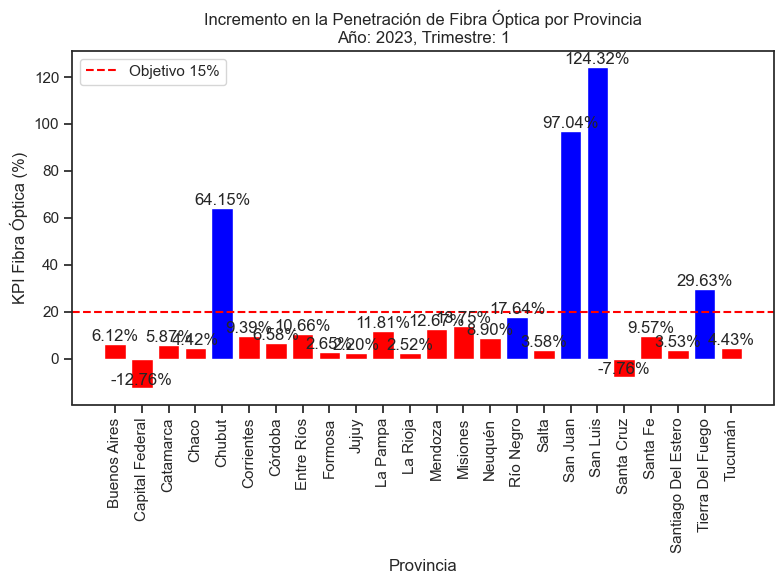

In [32]:
# Supongamos que seleccionamos el año 2022 y el trimestre 1
ano_seleccionado = 2023
trimestre_seleccionado = 1

# Filtrar los datos por el año y trimestre seleccionado
df_filtrado = df_kpi_fibra[(df_kpi_fibra['Año'] == ano_seleccionado) & (df_kpi_fibra['Trimestre'] == trimestre_seleccionado)]

# Graficar el KPI para el año y trimestre seleccionado
plt.figure(figsize=(8, 6))
bars = plt.bar(df_filtrado['Provincia'], df_filtrado['KPI Fibra Óptica'], color=['blue' if x >= 15 else 'red' for x in df_filtrado['KPI Fibra Óptica']])

# Añadir título y etiquetas de los ejes
plt.title(f'Incremento en la Penetración de Fibra Óptica por Provincia\nAño: {ano_seleccionado}, Trimestre: {trimestre_seleccionado}')
plt.xlabel('Provincia')
plt.ylabel('KPI Fibra Óptica (%)')
plt.xticks(rotation=90)

# Añadir las leyendas porcentuales en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.axhline(20, color='red', linestyle='--', label='Objetivo 15%')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
# # Exportamos dataframes para comenzar el diseño del dashboard en Power BI. 
# df_kpi.to_csv('C:\\Users\\felip\\Desktop\\Proyecto2\\Data\\df_kpi.csv', index=False)
# df_kpi2.to_csv('C:\\Users\\felip\\Desktop\\Proyecto2\\Data\\df_kpi2.csv', index=False)
# df_kpi_fibra.to_csv('C:\\Users\\felip\\Desktop\\Proyecto2\\Data\\df_kpi_fibra.csv', index=False)